# CUSTOMER SEGMENTATION MODEL

# DATA PREPROCESSING

## IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

## LOAD DATA

In [ ]:
# Customer
df1 = pd.read_csv('drive/MyDrive/DATA SCIENCE PORTFOLIO/PBI - KALBE NUTRITIONALS - DATA SCIENTIST/Minggu 4 - Final Project/Customer.csv')

# Store
df2 = pd.read_csv('drive/MyDrive/DATA SCIENCE PORTFOLIO/PBI - KALBE NUTRITIONALS - DATA SCIENTIST/Minggu 4 - Final Project/Store.csv')

# Product
df3 = pd.read_csv('drive/MyDrive/DATA SCIENCE PORTFOLIO/PBI - KALBE NUTRITIONALS - DATA SCIENTIST/Minggu 4 - Final Project/Product.csv')

# Transaction
df4 = pd.read_csv('drive/MyDrive/DATA SCIENCE PORTFOLIO/PBI - KALBE NUTRITIONALS - DATA SCIENTIST/Minggu 4 - Final Project/Transaction.csv')

## MERGE DATA

In [ ]:
# Transcation with Customer
df = df4.merge(df1, left_on='CustomerID', right_on='CustomerID')
df.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income
0,TR11369,328,1/1/2022,P3,7500,4,30000,12,36,0,Married,"10,53"
1,TR67395,328,1/22/2022,P8,16000,3,48000,11,36,0,Married,"10,53"
2,TR89012,328,3/25/2022,P5,4200,5,21000,6,36,0,Married,"10,53"
3,TR97172,328,5/21/2022,P1,8800,5,44000,1,36,0,Married,"10,53"
4,TR57013,328,9/15/2022,P7,9400,6,56400,1,36,0,Married,"10,53"


In [ ]:
# Transcation with Customer
df = df.merge(df3, left_on='ProductID', right_on='ProductID')
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y
0,TR11369,328,1/1/2022,P3,7500,4,30000,12,36,0,Married,"10,53",Crackers,7500
1,TR20170,165,7/23/2022,P3,7500,2,15000,13,44,1,Married,"14,58",Crackers,7500
2,TR80016,183,1/24/2022,P3,7500,2,15000,10,27,1,Single,"0,18",Crackers,7500
3,TR89318,183,7/17/2022,P3,7500,1,7500,12,27,1,Single,"0,18",Crackers,7500
4,TR82094,183,9/15/2022,P3,7500,2,15000,1,27,1,Single,"0,18",Crackers,7500


In [ ]:
# Transcation with Store
df = df.merge(df2, left_on='StoreID', right_on='StoreID')
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,1/1/2022,P3,7500,4,30000,12,36,0,Married,"10,53",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
1,TR89318,183,7/17/2022,P3,7500,1,7500,12,27,1,Single,"0,18",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
2,TR9106,123,9/26/2022,P3,7500,4,30000,12,34,0,Married,"4,36",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
3,TR4331,335,1/8/2022,P3,7500,3,22500,12,29,1,Single,"4,74",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
4,TR6445,181,1/10/2022,P3,7500,4,30000,12,33,1,Married,"9,94",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"


## CHECK MISSING VALUES

In [ ]:
df.isnull().sum()

TransactionID      0
CustomerID         0
Date               0
ProductID          0
Price_x            0
Qty                0
TotalAmount        0
StoreID            0
Age                0
Gender             0
Marital Status    44
Income             0
Product Name       0
Price_y            0
StoreName          0
GroupStore         0
Type               0
Latitude           0
Longitude          0
dtype: int64

In [ ]:
# Fill missing values with modes
df['Marital Status'].fillna(df['Marital Status'].mode()[0], inplace=True)

## CHECK DUPLICATED VALUES

In [ ]:
df.duplicated().sum()

0

## DROP REDUNDANT COLUMNS

In [ ]:
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,1/1/2022,P3,7500,4,30000,12,36,0,Married,"10,53",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
1,TR89318,183,7/17/2022,P3,7500,1,7500,12,27,1,Single,"0,18",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
2,TR9106,123,9/26/2022,P3,7500,4,30000,12,34,0,Married,"4,36",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
3,TR4331,335,1/8/2022,P3,7500,3,22500,12,29,1,Single,"4,74",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
4,TR6445,181,1/10/2022,P3,7500,4,30000,12,33,1,Married,"9,94",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"


In [ ]:
# Drop ID's columns because it does not have any meaning
df = df.drop(['ProductID', 'StoreID'], axis=1)

## ENCODING

In [ ]:
df.head()

,TransactionID,CustomerID,Date,Price_x,Qty,TotalAmount,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,1/1/2022,7500,4,30000,36,0,Married,"10,53",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
1,TR89318,183,7/17/2022,7500,1,7500,27,1,Single,"0,18",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
2,TR9106,123,9/26/2022,7500,4,30000,34,0,Married,"4,36",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
3,TR4331,335,1/8/2022,7500,3,22500,29,1,Single,"4,74",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
4,TR6445,181,1/10/2022,7500,4,30000,33,1,Married,"9,94",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_columns=['Marital Status','Product Name','StoreName','GroupStore','Type', 'Longitude','Latitude']
for col in categorical_columns:
    # make the encoder
    encoder = LabelEncoder()
    # fit the encoder with col we want to label for information good
    encoder.fit(df[col])
    # print information
    print('Column:', col)
    print('Original categories:', encoder.classes_)
    print('Encoded values:', encoder.transform(encoder.classes_))
    print('\n')
    # fit transform to apply the label
    df[col] = encoder.fit_transform(df[col])

Column: Marital Status
Original categories: ['Married' 'Single']
Encoded values: [0 1]


Column: Product Name
Original categories: ['Cashew' 'Cheese Stick' 'Choco Bar' 'Coffee Candy' 'Crackers'
 'Ginger Candy ' 'Oat' 'Potato Chip' 'Thai Tea' 'Yoghurt']
Encoded values: [0 1 2 3 4 5 6 7 8 9]


Column: StoreName
Original categories: ['Bonafid' 'Buana' 'Buana Indah' 'Gita Ginara' 'Harapan Baru' 'Lingga'
 'Prestasi Utama' 'Priangan' 'Prima Kelapa Dua' 'Prima Kota'
 'Prima Tendean' 'Sinar Harapan']
Encoded values: [ 0  1  2  3  4  5  6  7  8  9 10 11]


Column: GroupStore
Original categories: ['Buana' 'Gita' 'Harapan Baru' 'Lingga' 'Prestasi' 'Priangan' 'Prima']
Encoded values: [0 1 2 3 4 5 6]


Column: Type
Original categories: ['General Trade' 'Modern Trade']
Encoded values: [0 1]


Column: Longitude
Original categories: ['10,526,667' '101,447,403' '104,756,554' '106,816,666' '107,608,238'
 '11,942,379' '110,370,529' '110,416,664' '112,768,845' '114,590,111'
 '116,825,264' '128,190,643' '9

## DATA TRANSFORMATION

In [ ]:
df.head()

,TransactionID,CustomerID,Date,Price_x,Qty,TotalAmount,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,1/1/2022,7500,4,30000,36,0,0,"10,53",4,7500,6,4,0,1,2
1,TR89318,183,7/17/2022,7500,1,7500,27,1,1,"0,18",4,7500,6,4,0,1,2
2,TR9106,123,9/26/2022,7500,4,30000,34,0,0,"4,36",4,7500,6,4,0,1,2
3,TR4331,335,1/8/2022,7500,3,22500,29,1,1,"4,74",4,7500,6,4,0,1,2
4,TR6445,181,1/10/2022,7500,4,30000,33,1,0,"9,94",4,7500,6,4,0,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TransactionID   5020 non-null   object
 1   CustomerID      5020 non-null   int64 
 2   Date            5020 non-null   object
 3   Price_x         5020 non-null   int64 
 4   Qty             5020 non-null   int64 
 5   TotalAmount     5020 non-null   int64 
 6   Age             5020 non-null   int64 
 7   Gender          5020 non-null   int64 
 8   Marital Status  5020 non-null   int64 
 9   Income          5020 non-null   object
 10  Product Name    5020 non-null   int64 
 11  Price_y         5020 non-null   int64 
 12  StoreName       5020 non-null   int64 
 13  GroupStore      5020 non-null   int64 
 14  Type            5020 non-null   int64 
 15  Latitude        5020 non-null   int64 
 16  Longitude       5020 non-null   int64 
dtypes: int64(14), object(3)
memory usage: 705.9+ KB


In [ ]:
# Change Date to datetime
df = df.astype({
    'Date':'datetime64[ns]'
})

In [ ]:
# Change Income
df['Income'] = df['Income'].str.replace(',', '.')
df = df.astype({
    'Income':'float64'
})

## OUTLIERS

In [ ]:
from scipy import stats

In [ ]:
# Using z-score to find outliers and removes it
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['Price_x', 'Qty', 'TotalAmount', 'Age', 'Gender', 'Income', 'Price_y']:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries

df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 5020
Jumlah baris setelah memfilter outlier: 4907


## GROUP THE DATA

In [ ]:
df_before_grouped = df

In [ ]:
df = df_before_grouped.groupby(['CustomerID']).agg({'TransactionID':'count', 'Qty': 'sum', 'TotalAmount': 'sum'}).reset_index()

In [ ]:
df.head()

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


## STANDARDIZATION

[]

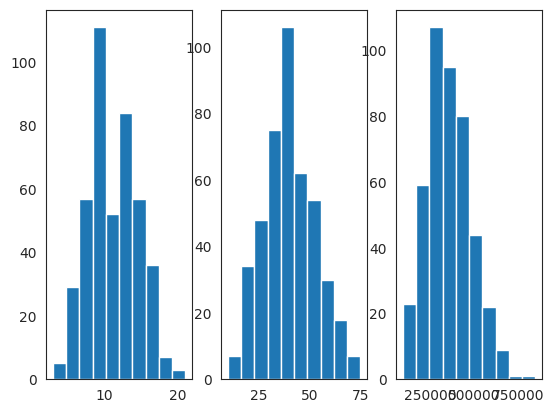

In [ ]:
# Standardize the columns because k-means works better when the data have mean of 0 and std of 1
# this is because k-means uses distance measurement

# Check data distribution first (if it is bell shaped then its gaussian/normal, therefore we can standardize it)
plt.subplot(1, 3, 1)
plt.hist(df['TransactionID'])
plt.plot()

plt.subplot(1, 3, 2)
plt.hist(df['Qty'])
plt.plot()

plt.subplot(1, 3, 3)
plt.hist(df['TotalAmount'])
plt.plot()

In [ ]:
# All columns have gaussian/normal data distribution so we can standardize it
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df['TransactionID'] = StandardScaler().fit_transform(df['TransactionID'].values.reshape(len(df), 1))
df['Qty'] = StandardScaler().fit_transform(df['Qty'].values.reshape(len(df), 1))
df['TotalAmount'] = StandardScaler().fit_transform(df['TotalAmount'].values.reshape(len(df), 1))

# CLUSTERING MODEL

## WITH TRANSACTIONID

### FIND OPTIMAL CLUSTER NUMBER

In [ ]:
X1 = df[['CustomerID', 'TransactionID']]
wcss=[]
for n in range(1, 11):
  model1 = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=100)
  model1.fit(X1)
  wcss.append(model1.inertia_)
print(wcss)

[7323214.514739227, 1850621.2386559285, 820236.845436929, 457437.1745372384, 294395.7933215591, 206224.61866750364, 150872.60331772518, 115067.59925234245, 90718.03879328672, 73775.54644299147]


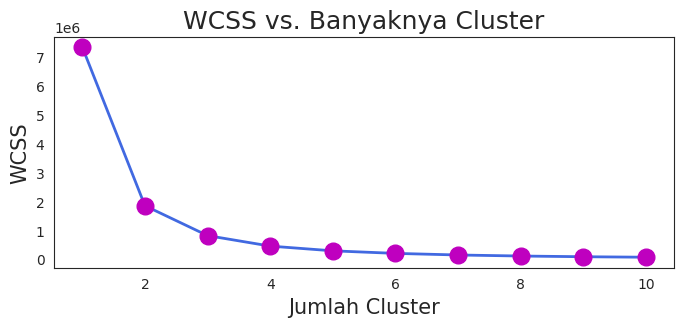

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(list(range(1,11)), wcss, color='royalblue', marker='o', linewidth=2, markersize=12, markerfacecolor='m',markeredgecolor='m')
plt.title('WCSS vs. Banyaknya Cluster', fontsize=18)
plt.xlabel('Jumlah Cluster', fontsize=15)
plt.ylabel('WCSS', fontsize=15)
plt.show()

# The WCSS is not changing drastically anymore on 3, therefore num of clusters are 3

### MAKE MODEL

In [ ]:
model1=KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=100)
model1.fit(X1)
labels1=model1.labels_
centroids1=model1.cluster_centers_

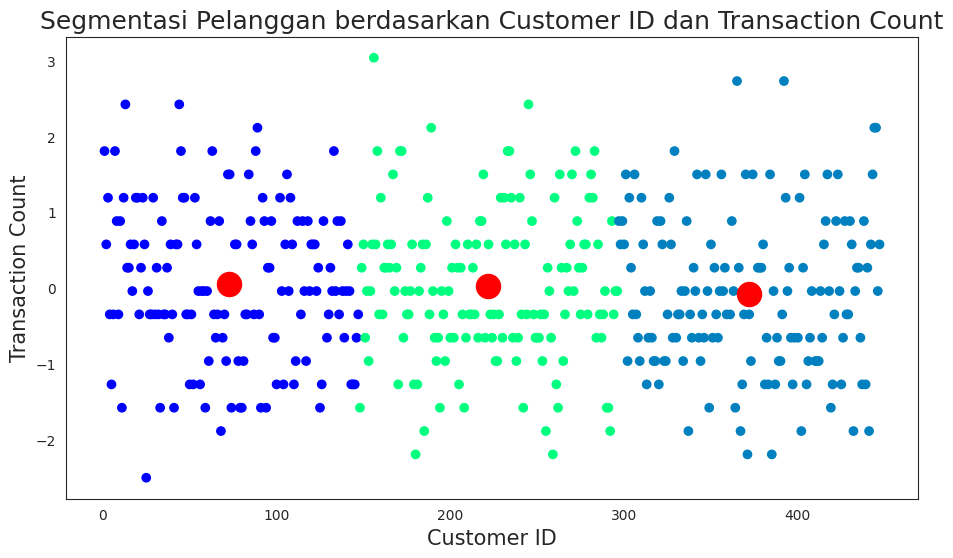

In [ ]:
plt.figure(figsize=(11,6))
sns.set_style('white')
plt.scatter(x=df['CustomerID'], y=df['TransactionID'], c=labels1, cmap='winter')
plt.scatter(x = centroids1[: , 0], y = centroids1[: , 1], s=300, c='red')
plt.xlabel('Customer ID', fontsize=15)
plt.ylabel('Transaction Count', fontsize=15)
plt.title('Segmentasi Pelanggan berdasarkan Customer ID dan Transaction Count', fontsize=18)
plt.show()

### EVALUATE MODEL

In [ ]:
# The closer to 1, the better the model is
from sklearn.metrics import silhouette_score

score1 = silhouette_score(df, labels1)
print('Silhouetter Score: %.3f' % score1)

Silhouetter Score: 0.585


## WITH QTY

### FIND OPTIMAL CLUSTER NUMBER

In [ ]:
X2 = df[['CustomerID', 'Qty']]
wcss=[]
for n in range(1, 11):
  model2 = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=100)
  model2.fit(X2)
  wcss.append(model2.inertia_)
print(wcss)

[7323214.5147392275, 1850620.80279182, 820236.4229556822, 457437.9446054938, 294396.2355525704, 206223.0572272687, 150866.866914163, 115070.08373735016, 90658.94647046275, 73543.40228647352]


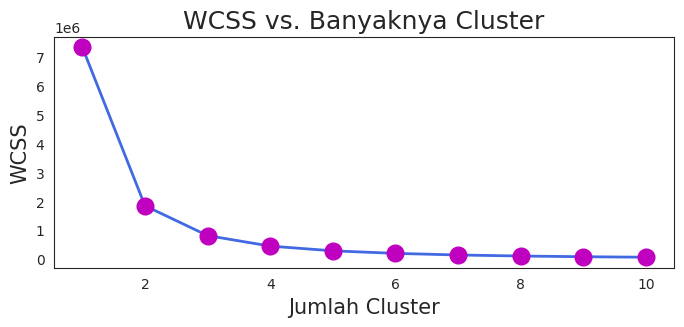

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(list(range(1,11)), wcss, color='royalblue', marker='o', linewidth=2, markersize=12, markerfacecolor='m',markeredgecolor='m')
plt.title('WCSS vs. Banyaknya Cluster', fontsize=18)
plt.xlabel('Jumlah Cluster', fontsize=15)
plt.ylabel('WCSS', fontsize=15)
plt.show()

# The WCSS is not changing drastically anymore on 3, therefore num of clusters are 3

### MAKE MODEL

In [ ]:
model2=KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=100)
model2.fit(X2)
labels2=model2.labels_
centroids2=model2.cluster_centers_

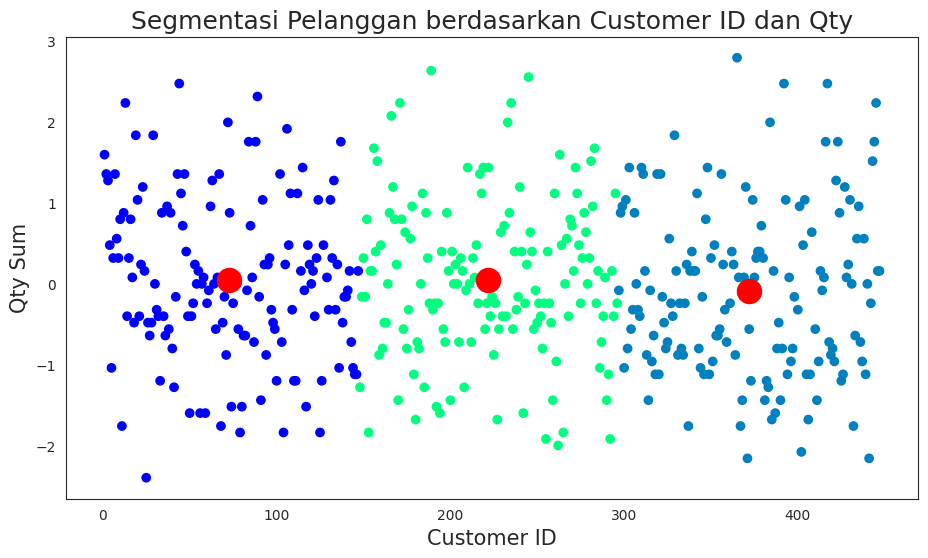

In [ ]:
plt.figure(figsize=(11,6))
sns.set_style('white')
plt.scatter(x=df['CustomerID'], y=df['Qty'], c=labels2, cmap='winter')
plt.scatter(x = centroids2[: , 0], y = centroids2[: , 1], s=300, c='red')
plt.xlabel('Customer ID', fontsize=15)
plt.ylabel('Qty Sum', fontsize=15)
plt.title('Segmentasi Pelanggan berdasarkan Customer ID dan Qty', fontsize=18)
plt.show()

### EVALUATE MODEL

In [ ]:
# The closer to 1, the better the model is
from sklearn.metrics import silhouette_score

score2 = silhouette_score(df, labels2)
print('Silhouetter Score: %.3f' % score2)

Silhouetter Score: 0.585


## WITH TOTAL AMOUNT

### FIND OPTIMAL CLUSTER NUMBER

In [ ]:
X3 = df[['CustomerID', 'TotalAmount']]
wcss=[]
for n in range(1, 11):
  model3 = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=100)
  model3.fit(X3)
  wcss.append(model3.inertia_)
print(wcss)

[7323214.514739228, 1850620.271378604, 820235.6544027159, 457436.75517684175, 294394.41713926, 206222.70662602817, 150865.45118288504, 115039.12439269673, 90658.69294455033, 73581.05401892119]


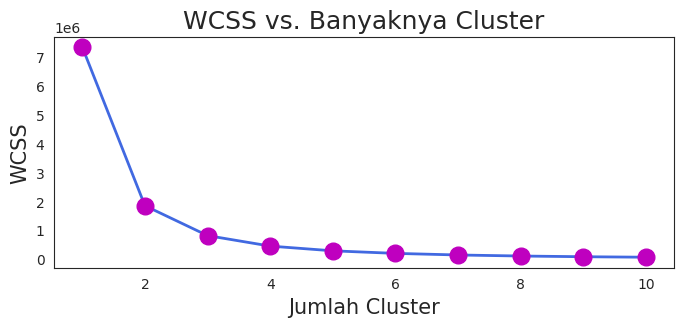

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(list(range(1,11)), wcss, color='royalblue', marker='o', linewidth=2, markersize=12, markerfacecolor='m',markeredgecolor='m')
plt.title('WCSS vs. Banyaknya Cluster', fontsize=18)
plt.xlabel('Jumlah Cluster', fontsize=15)
plt.ylabel('WCSS', fontsize=15)
plt.show()

# The WCSS is not changing drastically anymore on 3, therefore num of clusters are 3

### MAKE MODEL

In [ ]:
model3=KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=100)
model3.fit(X3)
labels3=model3.labels_
centroids3=model3.cluster_centers_

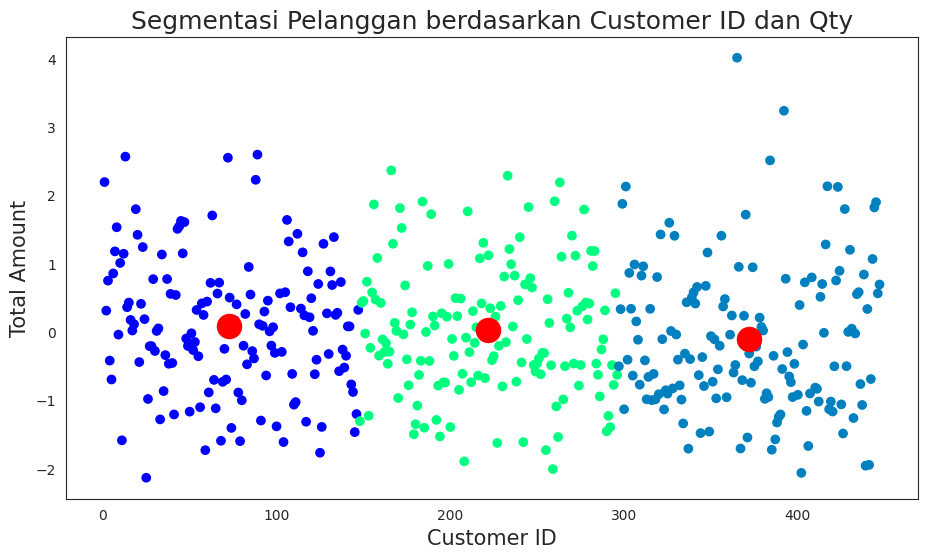

In [ ]:
plt.figure(figsize=(11,6))
sns.set_style('white')
plt.scatter(x=df['CustomerID'], y=df['TotalAmount'], c=labels3, cmap='winter')
plt.scatter(x = centroids3[: , 0], y = centroids3[: , 1], s=300, c='red')
plt.xlabel('Customer ID', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.title('Segmentasi Pelanggan berdasarkan Customer ID dan Qty', fontsize=18)
plt.show()

### EVALUATE MODEL

In [ ]:
# The closer to 1, the better the model is
from sklearn.metrics import silhouette_score

score3 = silhouette_score(df, labels3)
print('Silhouetter Score: %.3f' % score3)

Silhouetter Score: 0.585
